In [7]:
import eeg_tools as et

In [8]:
et.toolkit_help()

REQUIRED FILE NAME FORMAT: [ EC/EO ]_[ C/A ]_[ ID ]_[ RAW/ADJ ]	 eg: EC_A_103_RAW, eo_c_144_adj
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
FUNC: toolkit_help()
ARGS: none
USE: Display available functions and their uses and the file format reqd.
----------------------------------------------------------------------------------------------------
FUNC: plot_all_in_one(file)
ARGS: file name in reqd. format
USE: plot all channel data in one graph, every channel centered at x-axis
----------------------------------------------------------------------------------------------------
FUNC: plot_eeg(file)
ARGS: file name in reqd. format
USE: plot all channel data in one graph, seperated: main eeg-like plot
----------------------------------------------------------------------------------------------------
FUNC: plot_single_channel(file, num

In [21]:
import pandas as pd
import numpy as np
import os
from mat4py import loadmat, savemat

In [22]:
# raw data paths
raw_base = os.path.normpath("D:\Data Division\Raw Data")
eo_adhd = os.path.join(raw_base, 'Eyes-open', 'ADHD')
ec_adhd = os.path.join(raw_base, 'Eyes-closed', 'ADHD')
eo_cont = os.path.join(raw_base, 'Eyes-open', 'Control')
ec_cont = os.path.join(raw_base, 'Eyes-closed', 'Control')

# channel locations path
locs_path = os.path.normpath("D:\Data Division\Standard-10-20-Cap19.locs")

# processed data paths
proc_base = os.path.normpath("D:\MatLab\\toolbox\eeglab2021.0\eeglab2021.0\data_for_processing\EEG_DATA")
# ADJUST
adj_base = os.path.join(proc_base, "Adjust")
adj_eo_adhd = os.path.join(adj_base, 'ADHD_EO')
adj_ec_adhd = os.path.join(adj_base, 'ADHD_EC')
adj_eo_cont = os.path.join(adj_base, 'CONTROL_EO')
adj_ec_cont = os.path.join(adj_base, 'CONTROL_EC')

In [101]:
channels = []
locs = open(locs_path)
for i in locs.read().split('\t'):
    if '\n' in i:
        channels.append(i.split('\n')[0].strip())
channels

['Fp1',
 'Fp2',
 'F7',
 'F3',
 'Fz',
 'F4',
 'F8',
 'T7',
 'C3',
 'Cz',
 'C4',
 'T8',
 'P7',
 'P3',
 'Pz',
 'P4',
 'P8',
 'O1',
 'O2']

In [36]:
eo_a = ec_a = eo_c = ec_c = np.zeros(19*256*180).reshape(256*180, 19)

In [57]:
for f in os.listdir(eo_adhd):
    eo_a += np.array(loadmat(os.path.join(eo_adhd, f))['EO_Data'])
eo_a /= len(os.listdir(eo_adhd))

In [58]:
# 3 files are longer
# A_122_EC.mat
# A_138_EC.mat
# A_200_EC.mat
for f in os.listdir(ec_adhd):
    ec_a += np.array(loadmat(os.path.join(ec_adhd, f))['EC_Data'][:256*180])
ec_a /= len(os.listdir(ec_adhd))

In [59]:
for f in os.listdir(eo_cont):
    eo_c += np.array(loadmat(os.path.join(eo_cont, f))['EO_Data'])
eo_c /= len(os.listdir(eo_cont))

In [60]:
for f in os.listdir(ec_cont):
    ec_c += np.array(loadmat(os.path.join(ec_cont, f))['EC_Data'])
ec_c /= len(os.listdir(ec_cont))

In [117]:
# Mean values
print("MEAN EO ADHD: ", np.mean(eo_a))
print("MEAN EC ADHD: ", np.mean(ec_a))
print("MEAN EO CONT: ", np.mean(eo_c))
print("MEAN EC CONT: ", np.mean(ec_c))

MEAN EO ADHD:  -0.08141999429913911
MEAN EC ADHD:  -0.08237169619350262
MEAN EO CONT:  -0.08495253563596486
MEAN EC CONT:  -0.08371717836257317


In [118]:
# Median values
print("MEDIAN EO ADHD: ", np.median(eo_a))
print("MEDIAN EC ADHD: ", np.median(ec_a))
print("MEDIAN EO CONT: ", np.median(eo_c))
print("MEDIAN EC CONT: ", np.median(ec_c))

MEDIAN EO ADHD:  -0.060660932548664295
MEDIAN EC ADHD:  -0.03802625622453605
MEDIAN EO CONT:  -0.07719999999999999
MEDIAN EC CONT:  -0.06239999999999995


In [113]:
EO_A = pd.DataFrame(eo_a)
EO_A.set_axis(channels, axis=1, inplace=True)
EO_A.head()

,Fp1,Fp2,F7,F3,Fz,F4,F8,T7,C3,Cz,C4,T8,P7,P3,Pz,P4,P8,O1,O2
0,2.473517,-0.481213,-0.794024,-0.349479,1.757809,-0.289724,-0.427343,1.528293,0.683567,-0.457673,0.255772,1.576732,-4.037121,-1.489814,1.027162,1.080579,-0.119964,0.980534,-1.123585
1,2.411951,-0.712992,-1.018560,-0.559529,1.425079,-0.197827,-0.198280,1.367134,0.437302,1.640109,0.105930,1.316433,-4.240833,-1.451788,0.926664,0.982345,-0.190584,0.861476,-1.243096
2,2.525124,-0.951562,-1.099140,-0.711634,0.959710,-0.110457,-0.021277,1.040290,0.217293,3.268447,0.052060,1.132187,-4.182435,-1.539158,0.736532,1.006338,-0.299683,0.749660,-1.267089
3,2.663649,-0.932549,-1.106836,-0.747397,0.970575,-0.094613,0.046175,0.885921,0.002263,3.902671,0.009959,0.917157,-4.014939,-1.439113,0.609778,1.159801,-0.287008,0.656858,-1.285650
4,2.746492,-0.853780,-1.116795,-0.764147,1.493436,-0.081938,0.092802,0.990041,-0.043459,3.799909,-0.091897,0.709371,-3.819828,-1.399276,0.566772,1.046175,-0.295156,0.598461,-1.205070


In [114]:
EC_A = pd.DataFrame(ec_a)
EC_A.set_axis(channels, axis=1, inplace=True)
EC_A.head()

,Fp1,Fp2,F7,F3,Fz,F4,F8,T7,C3,Cz,C4,T8,P7,P3,Pz,P4,P8,O1,O2
0,3.133092,-2.438660,-0.389769,0.203712,-0.029425,-1.864192,-0.810321,0.592123,-1.827071,13.287008,-0.871888,-0.487098,-2.100951,-1.915346,-1.611136,-0.791761,7.645994,-0.125849,-1.634224
1,1.007696,-4.500226,-2.529199,-1.559529,-1.702580,-3.836125,-2.666365,-1.186057,-3.903124,49.618832,-2.787687,-2.449525,-3.836578,-3.770937,-3.307379,-2.443187,5.256225,-2.287460,-3.668628
2,-0.091897,-5.972838,-4.056587,-2.988230,-2.827524,-5.238117,-3.978723,-2.576732,-5.442282,75.247171,-4.075600,-3.846537,-5.076053,-5.241286,-4.433680,-3.525577,3.849253,-3.867361,-5.096876
3,-0.272522,-6.400634,-4.766410,-3.641014,-3.135808,-5.690358,-4.549570,-3.241738,-5.742417,83.753735,-4.521956,-4.316885,-5.504301,-5.715708,-4.773201,-4.095518,3.457673,-4.598461,-5.477139
4,0.363513,-5.832503,-4.414667,-3.593934,-2.889543,-5.230874,-4.141240,-3.286555,-5.341331,78.225441,-4.411046,-3.950204,-5.436849,-5.441829,-4.518334,-3.932549,3.726120,-4.486646,-4.885921


In [115]:
EO_C = pd.DataFrame(eo_c)
EO_C.set_axis(channels, axis=1, inplace=True)
EO_C.head()

,Fp1,Fp2,F7,F3,Fz,F4,F8,T7,C3,Cz,C4,T8,P7,P3,Pz,P4,P8,O1,O2
0,-10.4108,0.7392,1.9752,2.1496,-5.2332,2.5332,0.9808,2.4132,-6.9668,0.9860,-0.3160,-0.2956,-1.8892,1.0692,1.3288,1.6172,1.4240,2.9828,1.7496
1,-10.9016,0.6484,1.8520,2.2180,-5.4004,2.3264,1.1024,2.1884,-7.0116,3.0348,-0.2908,-0.0940,-2.0752,0.9512,1.1200,1.5504,1.2264,2.9588,1.4440
2,-11.3120,0.6292,1.8020,1.9600,-5.7144,2.2932,1.0732,2.0864,-7.1132,4.4584,-0.2172,0.1372,-2.1964,0.8940,1.2848,1.5764,1.0288,2.7400,1.2064
3,-11.4812,0.6684,1.7376,1.8684,-5.8036,2.1096,0.9388,2.1440,-7.0340,4.7860,-0.1956,0.3364,-2.1776,1.0296,1.3868,1.4628,0.8224,2.5556,1.1300
4,-11.3656,0.6404,1.7876,1.8124,-5.6928,1.9996,0.9612,2.1820,-7.0380,4.3684,-0.0716,0.3596,-2.0744,1.1060,1.6452,1.4352,0.8540,2.2804,0.9236


In [116]:
EC_C = pd.DataFrame(ec_c)
EC_C.set_axis(channels, axis=1, inplace=True)
EC_C.head()

,Fp1,Fp2,F7,F3,Fz,F4,F8,T7,C3,Cz,C4,T8,P7,P3,Pz,P4,P8,O1,O2
0,1.5092,-2.5808,0.3552,0.5896,3.7668,1.3732,0.2408,0.6932,-3.1868,-1.0140,-0.0760,0.1644,0.4708,-2.6308,1.5088,1.0172,-0.2360,-0.3772,-0.0104
1,1.5184,-2.6516,0.2720,0.4780,3.7196,1.4464,0.2824,0.1084,-3.1916,0.9548,-0.2108,0.0660,0.6048,-2.6888,1.3400,0.7104,-0.3936,-0.7812,0.0440
2,1.7480,-2.5908,0.0820,0.4200,3.8256,1.3332,0.2332,-0.3336,-3.2532,2.5184,-0.4572,0.1172,0.7636,-2.7460,1.2448,0.5364,-0.4912,-1.1400,-0.0336
3,1.7188,-2.4716,-0.0024,0.5084,3.9564,1.3296,0.1388,-0.5560,-3.4140,2.9060,-0.4956,0.1964,0.8824,-2.6504,1.2068,0.3228,-0.5976,-1.1844,-0.0100
4,1.7944,-2.3596,-0.1524,0.6924,3.7872,1.1596,0.0012,-0.5380,-3.5380,2.4884,-0.4716,0.3396,0.7856,-2.4940,1.2852,0.6152,-0.7460,-0.9996,-0.0564


In [119]:
EO_A.describe()

,Fp1,Fp2,F7,F3,Fz,F4,F8,T7,C3,Cz,C4,T8,P7,P3,Pz,P4,P8,O1,O2
count,46080.000000,46080.000000,46080.000000,46080.000000,46080.000000,46080.000000,46080.000000,46080.000000,46080.000000,46080.000000,46080.000000,46080.000000,46080.000000,46080.000000,46080.000000,46080.000000,46080.000000,46080.000000,46080.000000
mean,-0.093523,-0.109733,-0.096450,-0.083870,-0.080809,-0.077580,-0.061777,-0.058536,-0.116423,-0.095240,-0.083929,-0.067351,-0.086878,-0.070141,-0.077289,-0.080724,-0.073503,-0.076375,-0.056850
std,4.876286,2.005060,2.510922,1.886444,4.591933,1.998062,1.885350,1.901329,2.756293,27.704827,1.994399,2.066336,2.389189,2.378970,2.297376,2.058874,2.283455,2.075354,2.735645
min,-63.322770,-10.339973,-9.740607,-9.333182,-37.134450,-10.636487,-9.262110,-9.366229,-13.313717,-162.157085,-10.363060,-15.398370,-11.199638,-10.562245,-11.651426,-11.510638,-18.787687,-10.301947,-44.310548
25%,-2.876867,-1.136827,-1.183794,-1.002377,-2.804889,-1.103214,-0.957900,-1.004640,-1.742417,-3.422816,-1.064735,-0.969670,-1.426890,-1.305568,-1.255319,-1.072884,-1.244002,-1.157990,-1.117248
50%,-0.151879,-0.064735,-0.070847,-0.076505,0.061114,0.009507,0.018787,-0.047986,-0.200770,-0.478950,-0.096197,-0.044817,-0.043459,0.031010,-0.039384,-0.055681,-0.111815,-0.026709,-0.002263
75%,2.851969,0.976120,1.023201,0.849253,2.878339,1.023087,0.909914,0.913988,1.540969,1.837370,0.943413,0.870982,1.340426,1.321865,1.236306,0.935265,1.207447,1.087370,1.265278
max,19.704844,13.569488,71.904029,10.354006,18.493436,10.396107,9.750113,10.319602,10.327297,153.736080,17.334541,11.070620,12.413762,10.826166,10.391580,13.048891,10.221367,10.227705,10.900860


In [120]:
EO_C.describe()

,Fp1,Fp2,F7,F3,Fz,F4,F8,T7,C3,Cz,C4,T8,P7,P3,Pz,P4,P8,O1,O2
count,46080.000000,46080.000000,46080.000000,46080.000000,46080.000000,46080.000000,46080.000000,46080.000000,46080.000000,46080.000000,46080.000000,46080.000000,46080.000000,46080.000000,46080.000000,46080.000000,46080.000000,46080.000000,46080.000000
mean,-0.067865,-0.089171,-0.091703,-0.096603,-0.074555,-0.080889,-0.071489,-0.099674,-0.056500,-0.079345,-0.104121,-0.112838,-0.054093,-0.061898,-0.099599,-0.106590,-0.077497,-0.091159,-0.098511
std,3.718142,1.382981,5.014976,1.532459,3.095421,1.358544,1.485247,1.516394,1.930489,2.706803,1.536069,1.595603,1.765433,2.882556,1.958009,1.843986,2.547287,1.508050,2.625836
min,-13.207600,-6.930000,-78.844000,-9.504000,-14.144000,-6.644000,-14.452400,-10.871600,-8.893200,-11.235200,-9.722000,-10.588400,-8.056000,-15.046800,-18.145200,-15.616400,-16.248800,-7.034400,-34.475200
25%,-2.382000,-0.860000,-0.893700,-0.968400,-1.970400,-0.842800,-0.889700,-0.914400,-1.152400,-1.494500,-0.993600,-1.043200,-1.147300,-1.173600,-1.106400,-1.078500,-1.178400,-0.929700,-1.094400
50%,0.025600,-0.074800,-0.046800,-0.075800,0.078800,-0.074000,-0.073200,-0.102800,-0.111800,-0.214800,-0.103200,-0.077600,0.014200,-0.214400,-0.103200,-0.118000,-0.084800,-0.044400,0.048000
75%,2.411300,0.724800,0.792000,0.813600,1.943600,0.720100,0.784800,0.735600,1.075600,1.285200,0.824100,0.914800,1.104900,0.862400,0.975200,0.920800,1.046000,0.844800,1.210400
max,12.564000,7.068000,31.172000,7.564000,11.165200,6.366400,5.322800,8.558400,7.670000,13.087600,7.514400,7.608800,8.516400,21.766000,8.347600,8.379200,42.454000,7.827600,8.770800


In [122]:
EC_A.describe()

,Fp1,Fp2,F7,F3,Fz,F4,F8,T7,C3,Cz,C4,T8,P7,P3,Pz,P4,P8,O1,O2
count,46080.000000,46080.000000,46080.000000,46080.000000,46080.000000,46080.000000,46080.000000,46080.000000,46080.000000,46080.000000,46080.000000,46080.000000,46080.000000,46080.000000,46080.000000,46080.000000,46080.000000,46080.000000,46080.000000
mean,-0.041648,-0.090835,-0.074389,-0.100765,-0.054192,-0.094691,-0.073292,-0.072507,-0.038701,-0.077898,-0.102739,-0.059022,-0.069804,-0.103057,-0.190130,-0.098500,-0.065029,-0.096273,-0.061590
std,5.013867,2.960526,2.751233,2.874600,4.560946,2.785516,2.910539,2.710295,3.384437,37.688070,2.719067,2.709690,3.015082,6.495200,9.184257,2.790161,3.004621,2.707348,3.254713
min,-21.616116,-13.937528,-13.782254,-15.608873,-19.046175,-14.068357,-12.885469,-14.376188,-16.252150,-171.069715,-13.813038,-13.714350,-13.234948,-104.803531,-79.703938,-14.642825,-19.605251,-14.796741,-24.093255
25%,-3.218198,-1.889090,-1.567791,-1.730761,-2.842915,-1.617700,-1.647352,-1.474989,-2.173834,-10.803644,-1.468651,-1.453599,-1.889769,-1.572205,-1.940358,-1.679493,-1.669081,-1.526030,-1.815301
50%,0.009280,0.056134,-0.032141,-0.041195,-0.149615,-0.042553,-0.086917,0.032368,-0.008375,-1.237664,-0.005206,0.002263,0.088954,-0.061566,-0.062472,-0.051607,0.044364,-0.065867,0.024445
75%,2.840312,1.761091,1.510638,1.560887,2.855251,1.568696,1.561793,1.458126,2.165686,7.552060,1.402445,1.503395,1.801268,1.392598,1.698053,1.579900,1.657764,1.422363,1.781349
max,24.075147,11.869172,11.107741,13.206428,22.045269,11.783612,12.295156,11.706655,15.170213,166.536895,11.904482,11.755093,13.496605,66.821186,92.997737,10.927116,12.328203,12.939792,18.186962


In [123]:
EC_C.describe()

,Fp1,Fp2,F7,F3,Fz,F4,F8,T7,C3,Cz,C4,T8,P7,P3,Pz,P4,P8,O1,O2
count,46080.000000,46080.000000,46080.000000,46080.000000,46080.000000,46080.000000,46080.000000,46080.000000,46080.000000,46080.000000,46080.000000,46080.000000,46080.000000,46080.000000,46080.000000,46080.000000,46080.000000,46080.000000,46080.000000
mean,-0.053508,-0.080567,-0.078234,-0.105139,-0.078621,-0.079649,-0.054447,-0.105866,-0.101742,-0.104574,-0.128130,-0.095161,-0.084481,-0.099827,-0.125348,-0.085281,-0.051824,-0.083836,0.005610
std,3.116452,1.358984,1.344012,1.482484,3.130547,1.269300,1.249433,1.360311,2.182072,2.621478,1.470901,1.630185,1.717082,3.493242,1.545559,1.585486,1.721921,1.627370,3.082902
min,-11.069200,-11.849600,-8.393600,-7.284800,-10.928400,-6.556800,-7.423600,-5.107600,-8.901200,-13.408000,-5.978400,-10.991200,-13.282000,-41.500000,-9.537600,-7.876800,-7.496800,-6.216400,-15.125200
25%,-2.082800,-0.968000,-0.908000,-1.082400,-2.112800,-0.895700,-0.874100,-1.056400,-1.420400,-1.441700,-0.992800,-1.002400,-1.254500,-1.146400,-1.032500,-1.155200,-1.259200,-1.156000,-1.808000
50%,-0.039600,-0.064000,-0.024800,-0.096400,-0.081400,-0.026600,-0.042200,-0.125600,-0.072400,-0.049400,-0.097400,-0.010000,-0.014000,-0.056000,-0.104400,-0.121200,-0.044400,-0.089400,-0.011600
75%,1.980400,0.816800,0.776500,0.854400,1.838800,0.752800,0.782400,0.817700,1.188400,1.299600,0.792900,0.929200,1.110400,0.994400,0.810400,0.970800,1.090400,1.004800,1.766000
max,12.308400,5.536400,6.597200,10.146800,10.019600,8.822400,5.711600,5.086800,6.799200,11.352400,7.469600,7.144800,7.335600,25.536000,7.326400,8.614000,14.249600,9.644400,19.385600


In [124]:
%matplotlib inline
import matplotlib.pyplot as plt

array([[<AxesSubplot:title={'center':'Fp1'}>,
        <AxesSubplot:title={'center':'Fp2'}>,
        <AxesSubplot:title={'center':'F7'}>,
        <AxesSubplot:title={'center':'F3'}>],
       [<AxesSubplot:title={'center':'Fz'}>,
        <AxesSubplot:title={'center':'F4'}>,
        <AxesSubplot:title={'center':'F8'}>,
        <AxesSubplot:title={'center':'T7'}>],
       [<AxesSubplot:title={'center':'C3'}>,
        <AxesSubplot:title={'center':'Cz'}>,
        <AxesSubplot:title={'center':'C4'}>,
        <AxesSubplot:title={'center':'T8'}>],
       [<AxesSubplot:title={'center':'P7'}>,
        <AxesSubplot:title={'center':'P3'}>,
        <AxesSubplot:title={'center':'Pz'}>,
        <AxesSubplot:title={'center':'P4'}>],
       [<AxesSubplot:title={'center':'P8'}>,
        <AxesSubplot:title={'center':'O1'}>,
        <AxesSubplot:title={'center':'O2'}>, <AxesSubplot:>]],
      dtype=object)

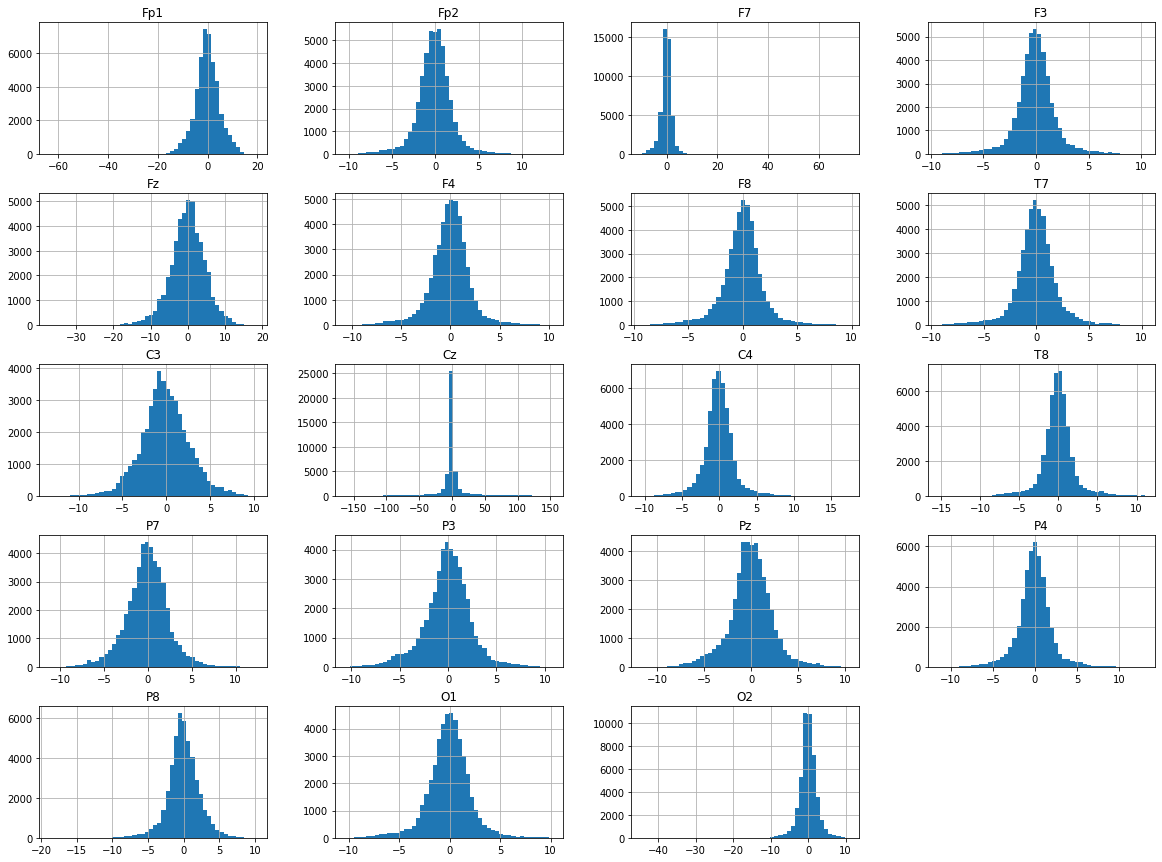

In [134]:
EO_A.hist(bins=50, figsize=(20,15))

array([[<AxesSubplot:title={'center':'Fp1'}>,
        <AxesSubplot:title={'center':'Fp2'}>,
        <AxesSubplot:title={'center':'F7'}>,
        <AxesSubplot:title={'center':'F3'}>],
       [<AxesSubplot:title={'center':'Fz'}>,
        <AxesSubplot:title={'center':'F4'}>,
        <AxesSubplot:title={'center':'F8'}>,
        <AxesSubplot:title={'center':'T7'}>],
       [<AxesSubplot:title={'center':'C3'}>,
        <AxesSubplot:title={'center':'Cz'}>,
        <AxesSubplot:title={'center':'C4'}>,
        <AxesSubplot:title={'center':'T8'}>],
       [<AxesSubplot:title={'center':'P7'}>,
        <AxesSubplot:title={'center':'P3'}>,
        <AxesSubplot:title={'center':'Pz'}>,
        <AxesSubplot:title={'center':'P4'}>],
       [<AxesSubplot:title={'center':'P8'}>,
        <AxesSubplot:title={'center':'O1'}>,
        <AxesSubplot:title={'center':'O2'}>, <AxesSubplot:>]],
      dtype=object)

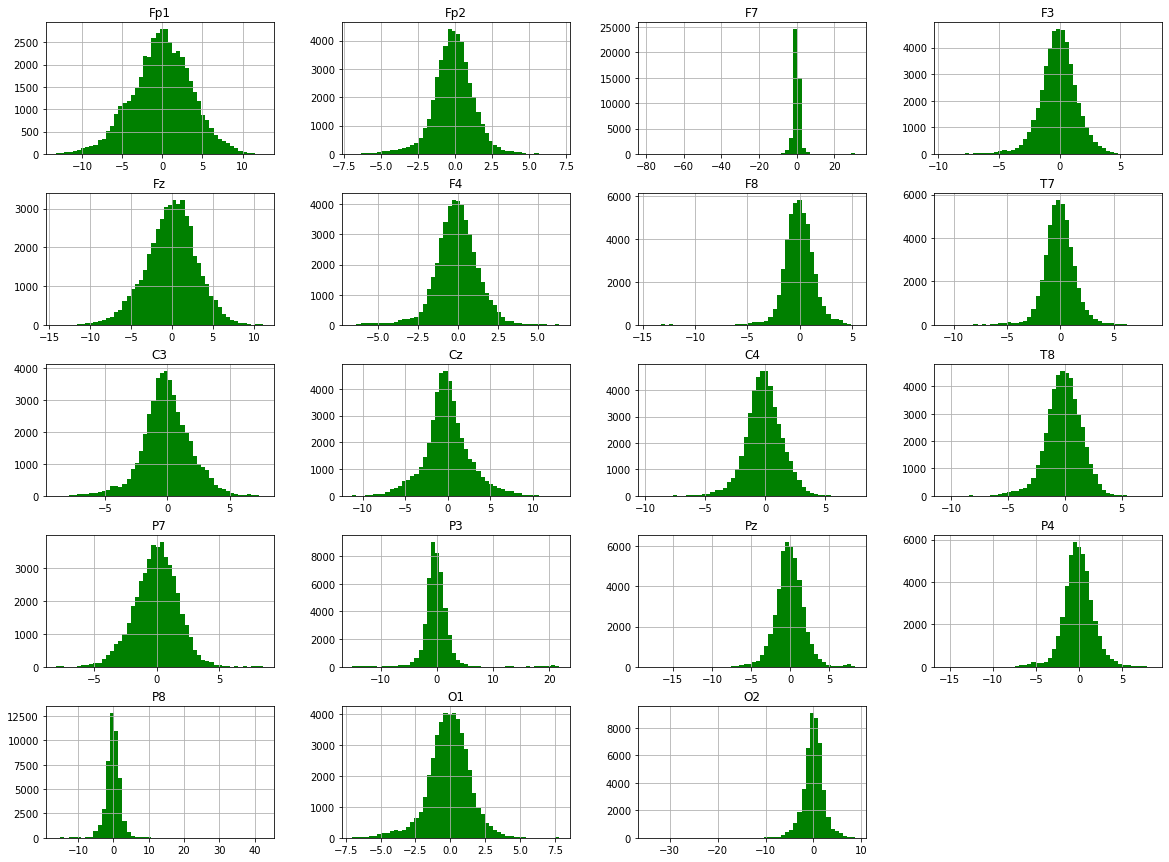

In [131]:
EO_C.hist(bins=50, figsize=(20,15), color='green')

array([[<AxesSubplot:title={'center':'Fp1'}>,
        <AxesSubplot:title={'center':'Fp2'}>,
        <AxesSubplot:title={'center':'F7'}>,
        <AxesSubplot:title={'center':'F3'}>],
       [<AxesSubplot:title={'center':'Fz'}>,
        <AxesSubplot:title={'center':'F4'}>,
        <AxesSubplot:title={'center':'F8'}>,
        <AxesSubplot:title={'center':'T7'}>],
       [<AxesSubplot:title={'center':'C3'}>,
        <AxesSubplot:title={'center':'Cz'}>,
        <AxesSubplot:title={'center':'C4'}>,
        <AxesSubplot:title={'center':'T8'}>],
       [<AxesSubplot:title={'center':'P7'}>,
        <AxesSubplot:title={'center':'P3'}>,
        <AxesSubplot:title={'center':'Pz'}>,
        <AxesSubplot:title={'center':'P4'}>],
       [<AxesSubplot:title={'center':'P8'}>,
        <AxesSubplot:title={'center':'O1'}>,
        <AxesSubplot:title={'center':'O2'}>, <AxesSubplot:>]],
      dtype=object)

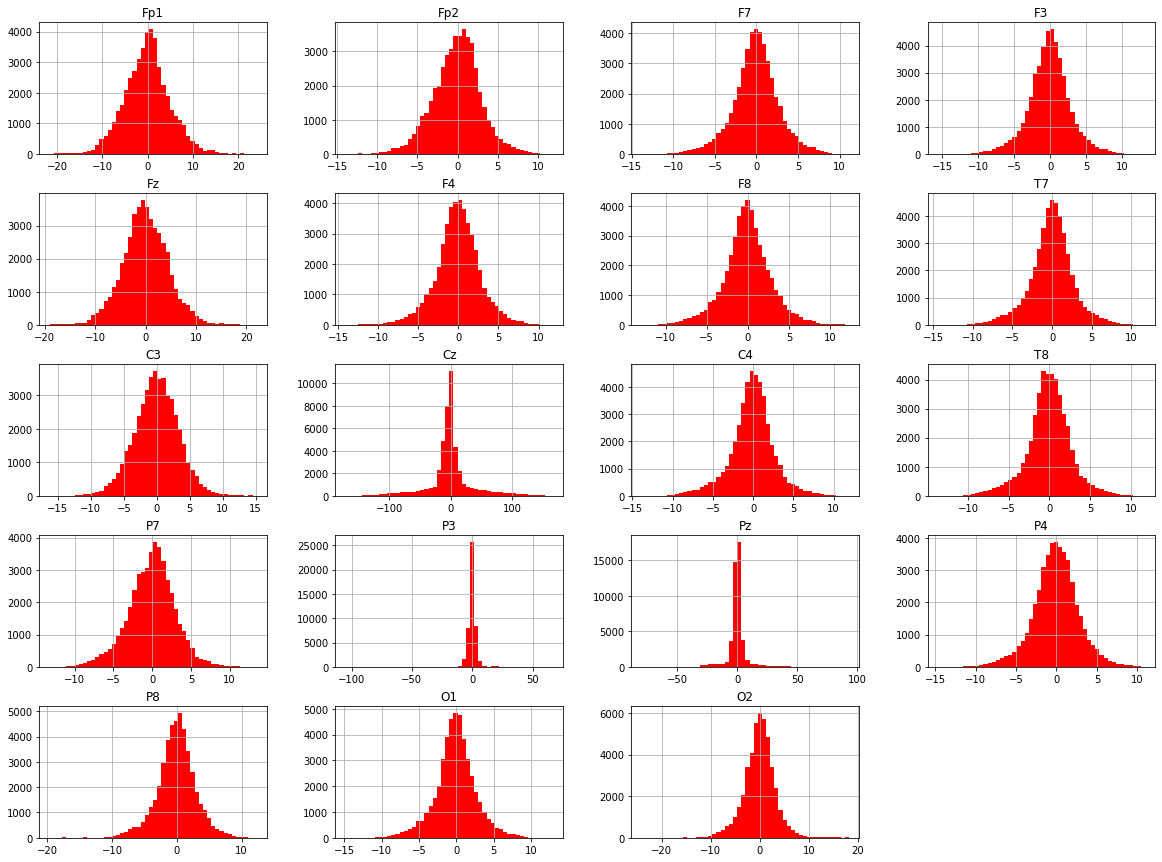

In [132]:
EC_A.hist(bins=50, figsize=(20,15), color='red')

array([[<AxesSubplot:title={'center':'Fp1'}>,
        <AxesSubplot:title={'center':'Fp2'}>,
        <AxesSubplot:title={'center':'F7'}>,
        <AxesSubplot:title={'center':'F3'}>],
       [<AxesSubplot:title={'center':'Fz'}>,
        <AxesSubplot:title={'center':'F4'}>,
        <AxesSubplot:title={'center':'F8'}>,
        <AxesSubplot:title={'center':'T7'}>],
       [<AxesSubplot:title={'center':'C3'}>,
        <AxesSubplot:title={'center':'Cz'}>,
        <AxesSubplot:title={'center':'C4'}>,
        <AxesSubplot:title={'center':'T8'}>],
       [<AxesSubplot:title={'center':'P7'}>,
        <AxesSubplot:title={'center':'P3'}>,
        <AxesSubplot:title={'center':'Pz'}>,
        <AxesSubplot:title={'center':'P4'}>],
       [<AxesSubplot:title={'center':'P8'}>,
        <AxesSubplot:title={'center':'O1'}>,
        <AxesSubplot:title={'center':'O2'}>, <AxesSubplot:>]],
      dtype=object)

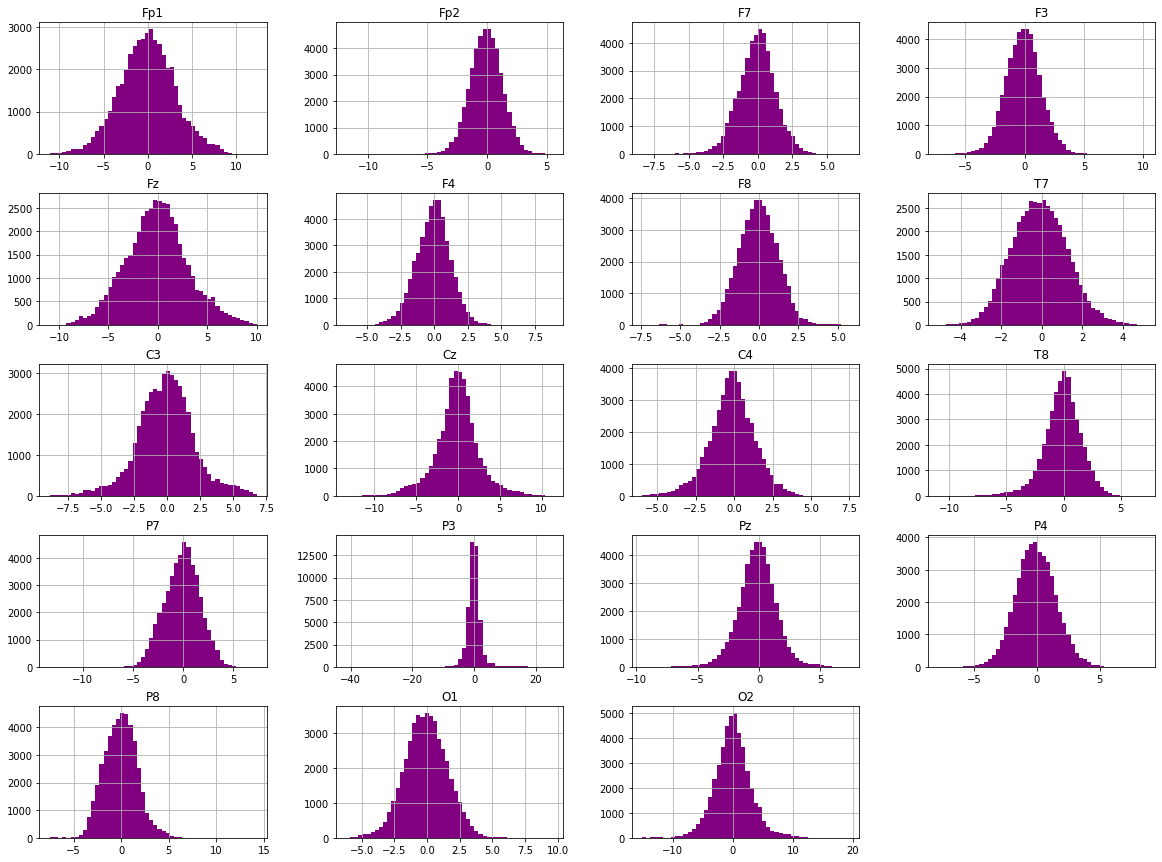

In [136]:
EC_C.hist(bins=50, figsize=(20,15), color='purple')

In [138]:
EC_C.describe()[1:2]-EC_A.describe()[1:2]

,Fp1,Fp2,F7,F3,Fz,F4,F8,T7,C3,Cz,C4,T8,P7,P3,Pz,P4,P8,O1,O2
mean,-0.01186,0.010268,-0.003845,-0.004373,-0.024428,0.015041,0.018844,-0.03336,-0.063041,-0.026676,-0.025391,-0.036139,-0.014678,0.003231,0.064782,0.013219,0.013204,0.012437,0.067199


In [146]:
(EC_C.describe()[1:2]-EC_A.describe()[1:2]).T.abs().nlargest(5,['mean'], keep='all')

,mean
O2,0.067199
Pz,0.064782
C3,0.063041
T8,0.036139
T7,0.033360


In [145]:
(EO_C.describe()[1:2]-EO_A.describe()[1:2]).T.abs().nlargest(5,['mean'], keep='all')

,mean
C3,0.059923
T8,0.045486
O2,0.041660
T7,0.041138
P7,0.032785


# O2, T8, C3, T7: channels with most difference in means

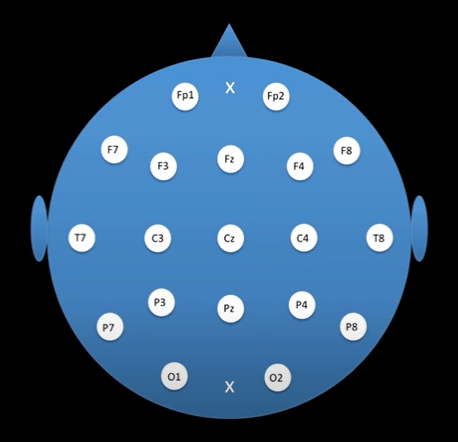

# T+C+O: ‘Cz’, ‘C3’, ‘O1’, ‘O2’, ‘T3’, ‘C4’, ‘T4’